In [18]:
#Programmer : Muhammad Khairul Rijal Bin Muhammad
#Matric No.: MAN 161021

In [19]:
#import libraries
import pandas as pd
import numpy as np
from matplotlib import style
%matplotlib inline
import matplotlib.pyplot as plt # graphics package
import seaborn as sns
from IPython.display import display, HTML

In [20]:
#Load Data From CSV
ins = pd.read_csv('C://Users/mkrijal/Desktop/Insurance/insurance.csv')
ins.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [21]:
#Dataset rows and columns
ins.shape

(1338, 7)

In [22]:
#Attributes type
ins.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [23]:
#Check missing value/null
tab_info=pd.DataFrame(ins.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(ins.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(ins.isnull().sum()/ins.shape[0]*100).T.rename(index={0:'null values (%)'}))
display(tab_info)

,age,sex,bmi,children,smoker,region,charges
column type,int64,object,float64,int64,object,object,float64
null values (nb),0,0,0,0,0,0,0
null values (%),0,0,0,0,0,0,0


In [24]:
#Check duplicate instances
ins.duplicated().sum()

1

In [25]:
#Show the summarize dataset
ins.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [26]:
cols = ['sex','smoker','region']
ins['status'] = ins[cols].sum(1)  #combine sex,smoker and region column
ins = ins.drop(cols, 1)
ins.head(5)

,age,bmi,children,charges,status
0,19,27.900,0,16884.92400,femaleyessouthwest
1,18,33.770,1,1725.55230,malenosoutheast
2,28,33.000,3,4449.46200,malenosoutheast
3,33,22.705,0,21984.47061,malenonorthwest
4,32,28.880,0,3866.85520,malenonorthwest


In [27]:
#Show status class
ins['status'].unique()

array(['femaleyessouthwest', 'malenosoutheast', 'malenonorthwest',
       'femalenosoutheast', 'femalenonorthwest', 'malenonortheast',
       'femaleyessoutheast', 'malenosouthwest', 'maleyessoutheast',
       'femalenonortheast', 'maleyessouthwest', 'femalenosouthwest',
       'femaleyesnortheast', 'maleyesnortheast', 'maleyesnorthwest',
       'femaleyesnorthwest'], dtype=object)

In [28]:
#Count no of smoker and not
pd.value_counts(ins["status"])

femalenosouthwest     141
femalenosoutheast     139
femalenonorthwest     135
malenosoutheast       134
femalenonortheast     132
malenonorthwest       132
malenosouthwest       126
malenonortheast       125
maleyessoutheast       55
maleyesnortheast       38
maleyessouthwest       37
femaleyessoutheast     36
femaleyesnortheast     29
femaleyesnorthwest     29
maleyesnorthwest       29
femaleyessouthwest     21
Name: status, dtype: int64

In [29]:
#Correlation Function
'''method : {‘pearson’, ‘kendall’, ‘spearman’}
pearson : standard correlation coefficient
kendall : Kendall Tau correlation coefficient
spearman : Spearman rank correlation
'''
correlation = ins.corr(method='pearson')
print(correlation)

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


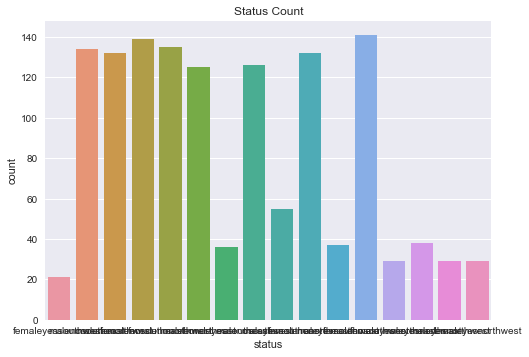

In [33]:
#Data Visualization
sns.set(font_scale=1)
sns.countplot(x="status", data=ins)
ins.loc[:,'status'].value_counts()
plt.title('Status Count')
plt.savefig("Figure 1_Bar Graph.png") #save figure

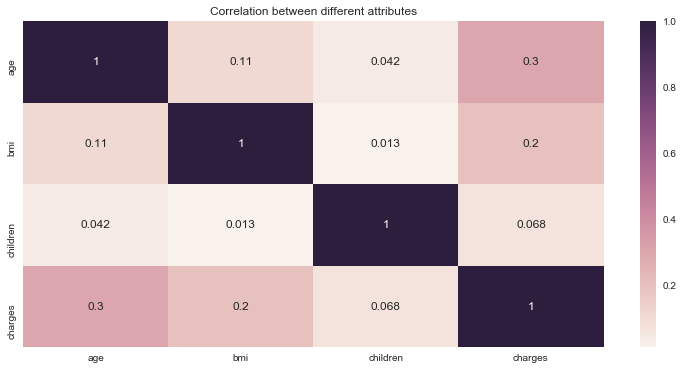

In [34]:
plt.figure(figsize=(13,6))
sns.heatmap(ins.corr(method='pearson'),annot=True)
plt.title('Correlation between different attributes')
plt.savefig("Figure 2_Correlation Attribute.png") #save figure